<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/hf_utilisation_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import transformers

 * page : https://huggingface.co/course/fr/chapter2/3?fw=tf
 * video : https://www.youtube.com/watch?v=d3JVgghSOew&ab_channel=HuggingFace

## Instanciation d'un model

 * `TFAutoModel` permet d'instancier une architecture de model à partir d'un checkpoint. Ca a l'air dêtre la meilleure façon de faire
 * `TFBertModel` permet d'instancier un modèle à partir d'un fichier / dictionnaire config. Bon je vois pas l'intérêt pour le moment

```python
from transformers import BertConfig, TFBertModel

config = BertConfig()
model = TFBertModel(config)

# Le modèle est initialisé de façon aléatoire !
```

Le modèle contient des poids aléatoires. Il peut donc être entraîné from scratch si on le désire. On préfère évidemment dans la mesure du possible utiliser des poids pretrained à l'aide de la méthode `.from_pretrained()`

```python
model = TFBertModel.from_pretrained("bert-base-cased")
```

Les poids pretrained sont cachés par défaut ici `~/.cache/huggingface/transformers`. Cependant, on peut modifier ce chemin en définissant la variable d'environnement `HF_HOME`. Bon comme envisagé plus haut, il vaut mieux toujours utiliser `TFAutoModel` plutot que le TFSpecifiedModel, ça n'a pour le moment pas trop d'intérêt à part si l'on souhaite avoir une custom configuration par exemple : 

```python
from transformers import TFBertModel,BertConfig

config = BertConfig.from_pretrained("bert_base_cased",num_hidden_layers=10)
new_bert = TFBertModel(config)
```

#### Schéma représentant les différentes étapes lors de l'instanciation d'un modèle

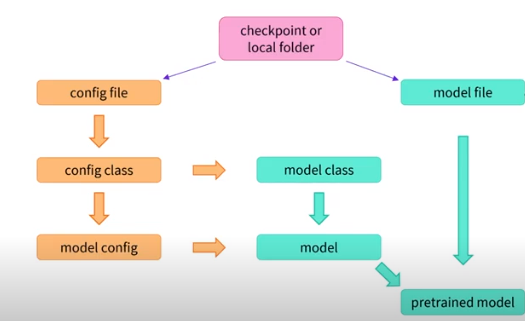

## Sauvegarder un modèle

Assez simple utiliser la méthode `.save_pretrained()` de l'objet model. Ca aura pour effat la création de deux fichier : 
 * `config.json` : contient entre autre l'architecture du modèl et la version de la lib `transformers` que vous avez utilisé
 * `tf_model.h5` : contient tout les poids du modèle
 
```python
model.save_pretrained("directory_on_my_computer")
# Sauvegarde

TFAutoModel.from_pretrained("directory_on_my_computer")
#Recharge du model
```